<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/oneleague_w5_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing with R



In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#### Difference in Proportions

Visually assessing the difference in proportions is equivalent to looking at a bar plot.  To test the difference in proportions we use the `prop.test` function.  You can either enter the counts directly of use `xtabs` to create the cross-tabulated data from a DataFrame.  

In [ ]:
#dataframe with clicks
df <- data.frame(page = c('original', 'new'), clicks = c(0.8, 0.82))
df

page,clicks
<chr>,<dbl>
original,0.80
new,0.82


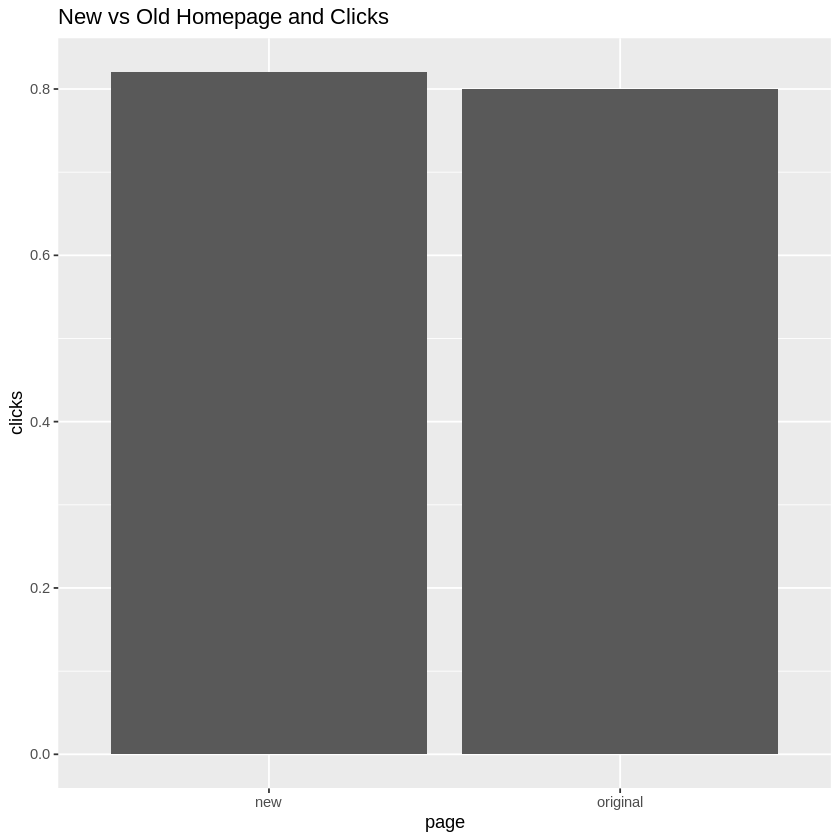

In [ ]:
#barplot of click rates
ggplot(df, aes(x=page, y=clicks)) + 
  geom_bar(stat = 'identity') + 
    labs(title = 'New vs Old Homepage and Clicks')

**Version 1**

| page | click  | total |
| ------ | ------- | ----- |
| Old | 400 | 500 |
| New | 410 | 500 |

**Version 2**

| page | click  | total |
| ------ | ------- | ----- |
| Old | 300 | 500 |
| New | 450 | 500 |

In [ ]:
#dataframe and barplot of v2
df2 <- data.frame(page = c('original', 'new'), clicks = c(0.6, 0.9))
df2

page,clicks
<chr>,<dbl>
original,0.6
new,0.9


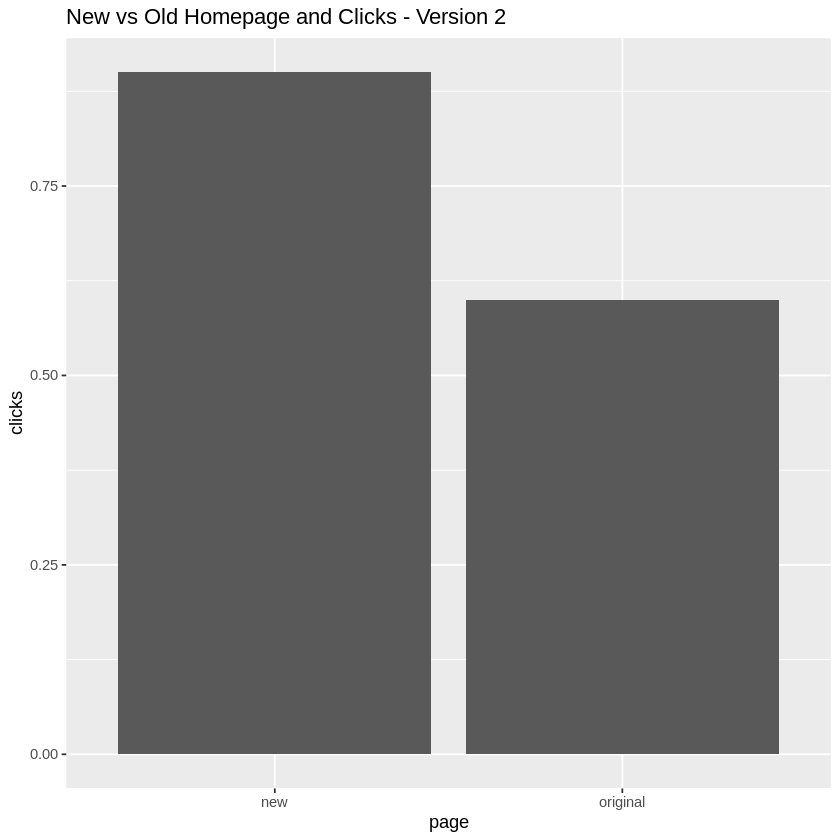

In [ ]:
ggplot(df2, aes(x=page, y=clicks)) +
  geom_bar(stat='identity') +
  labs(title = 'New vs Old Homepage and Clicks - Version 2')

### Datasets

- Load in data
- Explore features
- Opportunities for tests of proportions?

In [ ]:
email <- read_csv('email_small.csv')
head(email)

Rows: 15213 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): cpgn_id, group
dbl (11): user_id, open, click, purch, chard, sav_blanc, syrah, cab, past_pu...
lgl  (1): email

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


user_id,cpgn_id,group,email,open,click,purch,chard,sav_blanc,syrah,cab,past_purch,days_since,visits
<dbl>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1058220,1901Email,email_B,TRUE,0,0,0,0,0.00,0.00,0,0.00,289,4
1122167,1901Email,ctrl,FALSE,0,0,0,0,678.61,0.00,0,678.61,163,5
1003710,1901Email,ctrl,FALSE,0,0,0,0,0.00,0.00,0,0.00,72,6
1079666,1901Email,ctrl,FALSE,0,0,0,0,0.00,25.64,0,25.64,122,5
1100384,1901Email,email_A,TRUE,0,0,88,0,0.00,0.00,0,0.00,187,4
1054148,1901Email,ctrl,FALSE,0,0,0,0,0.00,407.96,0,407.96,278,8


In [ ]:
email_data_grouped <- email %>%
  group_by(group, open) %>%
  summarise(count = n()) %>%
  mutate(prop = count / sum(count))

email_data_grouped


`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group,open,count,prop
<chr>,<dbl>,<int>,<dbl>
ctrl,0,5106,1.0000000
email_A,0,1413,0.2843058
email_A,1,3557,0.7156942
email_B,0,1762,0.3430018
email_B,1,3375,0.6569982


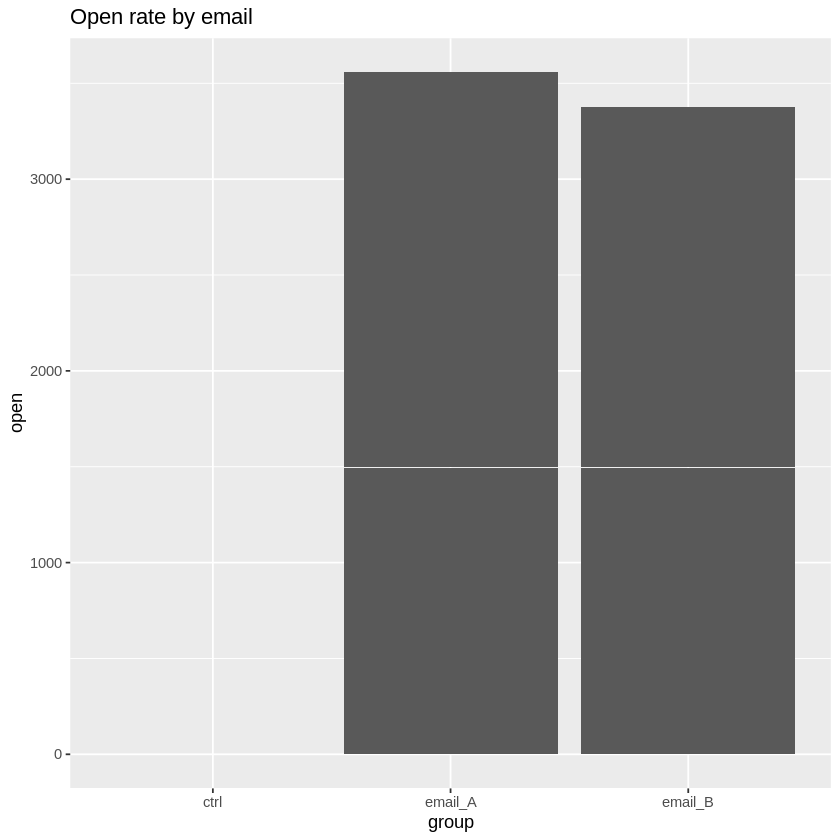

In [ ]:
ggplot(email,aes(x=group,y=open))+
  geom_bar(stat='identity')+
  labs(title = 'Open rate by email')

In [ ]:
subscriber <- read_csv('subscriber_data.csv')
head(subscriber)

Rows: 300 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): gender, ownHome, subscribe, Segment
dbl (3): age, income, kids

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,gender,income,kids,ownHome,subscribe,Segment
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
47.31613,Male,49482.81,2,ownNo,subNo,Suburb mix
31.38684,Male,35546.29,1,ownYes,subNo,Suburb mix
43.20034,Male,44169.19,0,ownYes,subNo,Suburb mix
37.31700,Female,81041.99,1,ownNo,subNo,Suburb mix
40.95439,Female,79353.01,3,ownYes,subNo,Suburb mix
43.03387,Male,58143.36,4,ownYes,subNo,Suburb mix


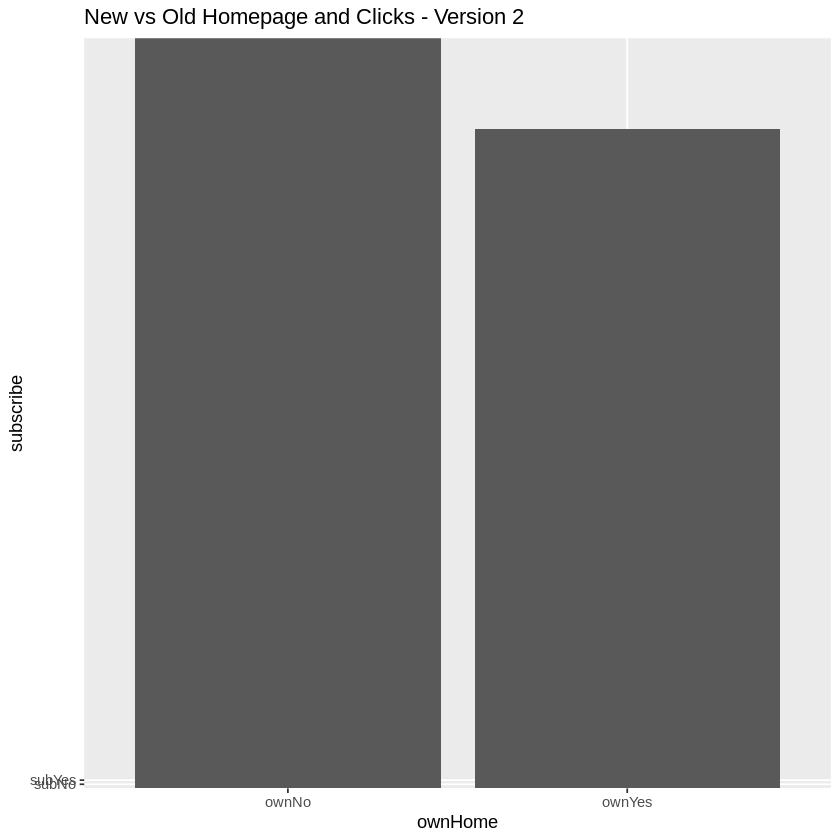

In [ ]:
ggplot(subscriber, aes(x=ownHome, y=subscribe)) +
  geom_bar(stat='identity') +
  labs(title = 'New vs Old Homepage and Clicks - Version 2')

### Hypothesis Testing

> The alternative hypothesis and null hypothesis are types of conjectures used in statistical tests, which are formal methods of reaching conclusions or making judgments on the basis of data. In statistical hypothesis testing, the null hypothesis and alternative hypothesis are two mutually exclusive statements.

> "The statement being tested in a test of statistical significance is called the null hypothesis. The test of significance is designed to assess the strength of the evidence against the null hypothesis. Usually, the null hypothesis is a statement of 'no effect' or 'no difference'."[2] Null hypothesis is often denoted as H0.

> The statement that is being tested against the null hypothesis is the alternative hypothesis[2]. Alternative hypothesis is often denoted as $H_a$ or $H_1$.

> In statistical hypothesis testing, to prove the alternative hypothesis is true, it should be shown that the data is contradictory to the null hypothesis. Namely, there is sufficient evidence against null hypothesis to demonstrate that the alternative hypothesis is true. -- from [wikipedia](https://en.wikipedia.org/wiki/Alternative_hypothesis)

In [ ]:
clicks <- c(400, 410)         #number of clicks by version
totals <- c(500, 500)         #number of total visits to site
prop.test(clicks, totals)     #test for difference in proportions


	2-sample test for equality of proportions with continuity correction

data:  clicks out of totals
X-squared = 0.52632, df = 1, p-value = 0.4682
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.07061343  0.03061343
sample estimates:
prop 1 prop 2 
  0.80   0.82 


**Version 2**

| page | click  | total |
| ------ | ------- | ----- |
| Old | 300 | 500 |
| New | 450 | 500 |

In [ ]:
clicks2 <- c(300, 450)        #number of clicks by version
totals <- c(500, 500)         #number of total visits to site
prop.test(clicks2, totals)    #testing the difference


	2-sample test for equality of proportions with continuity correction

data:  clicks2 out of totals
X-squared = 118.41, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.3523524 -0.2476476
sample estimates:
prop 1 prop 2 
   0.6    0.9 


In [ ]:
#extract specific elements
results <- prop.test(clicks2, totals)

In [ ]:
results$conf.int

[1] -0.3523524 -0.2476476
attr(,"conf.level")
[1] 0.95

#### Example: Product Recommendations

| page | click  | total |
| ------ | ------- | ----- |
| Old Algorithm | 420 | 1000 |
| New Algorithm | 510 | 1000 |

In [ ]:
#example 2 -- recommended product algorithms
clicks3 <- c(420, 510)        #number of clicks by version
totals <- c(1000, 1000)         #number of total visits to site
prop.test(clicks3, totals)    #testing the difference


	2-sample test for equality of proportions with continuity correction

data:  clicks3 out of totals
X-squared = 15.92, df = 1, p-value = 6.608e-05
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.13454033 -0.04545967
sample estimates:
prop 1 prop 2 
  0.42   0.51 


In [ ]:
results3 <- prop.test(clicks3, totals) 
results3$conf.int

[1] -0.13454033 -0.04545967
attr(,"conf.level")
[1] 0.95

**Instagram Advertising**

In [ ]:
#creating a dataframe


In [ ]:
#proportion test


#### Example 2: Wine Sales Data

Typically, rather than having a total count example we are provided a dataframe that contains the variable of interest alongside additional data on the customer or transaction.

In [67]:
#email data
emails <- read_csv('email_small.csv')
head(emails)

Rows: 15213 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): cpgn_id, group
dbl (11): user_id, open, click, purch, chard, sav_blanc, syrah, cab, past_pu...
lgl  (1): email

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


user_id,cpgn_id,group,email,open,click,purch,chard,sav_blanc,syrah,cab,past_purch,days_since,visits
<dbl>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1058220,1901Email,email_B,TRUE,0,0,0,0,0.00,0.00,0,0.00,289,4
1122167,1901Email,ctrl,FALSE,0,0,0,0,678.61,0.00,0,678.61,163,5
1003710,1901Email,ctrl,FALSE,0,0,0,0,0.00,0.00,0,0.00,72,6
1079666,1901Email,ctrl,FALSE,0,0,0,0,0.00,25.64,0,25.64,122,5
1100384,1901Email,email_A,TRUE,0,0,88,0,0.00,0.00,0,0.00,187,4
1054148,1901Email,ctrl,FALSE,0,0,0,0,0.00,407.96,0,407.96,278,8


In [68]:
#calculate proportions in each group
emails %>% 
  group_by(group) %>%
    summarise(mean(open))

group,mean(open)
<chr>,<dbl>
ctrl,0.0000000
email_A,0.7156942
email_B,0.6569982


In [69]:
###limit data to only those emailed
emailed <- emails[emails$group != 'ctrl',]
head(emailed)

user_id,cpgn_id,group,email,open,click,purch,chard,sav_blanc,syrah,cab,past_purch,days_since,visits
<dbl>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1058220,1901Email,email_B,TRUE,0,0,0.00,0.00,0,0.00,0.00,0.00,289,4
1100384,1901Email,email_A,TRUE,0,0,88.00,0.00,0,0.00,0.00,0.00,187,4
1065703,1901Email,email_A,TRUE,1,0,18.41,146.13,0,0.00,15.81,161.94,76,6
1097281,1901Email,email_A,TRUE,1,0,0.00,0.00,0,24.48,102.39,126.87,103,6
1010272,1901Email,email_A,TRUE,1,0,0.00,112.08,0,0.00,0.00,112.08,219,5
1098389,1901Email,email_A,TRUE,1,0,0.00,0.00,0,309.69,0.00,309.69,204,7


In [70]:
#use xtabs to cross-tabulate email groups and open
#data with successes as first column and failures as second
ctab <- xtabs(~group + open, data = emailed)[,2:1]

In [73]:
#run test on proportions
prop.test(ctab)


	2-sample test for equality of proportions with continuity correction

data:  ctab
X-squared = 40.121, df = 1, p-value = 2.388e-10
alternative hypothesis: two.sided
95 percent confidence interval:
 0.04044830 0.07694353
sample estimates:
   prop 1    prop 2 
0.7156942 0.6569982 


In [76]:
#clicks by email

ctab2 <- xtabs(~group + click, data = emailed)[,2:1]
prop.test(ctab2)


	2-sample test for equality of proportions with continuity correction

data:  ctab2
X-squared = 25.821, df = 1, p-value = 3.746e-07
alternative hypothesis: two.sided
95 percent confidence interval:
 0.01918430 0.04370478
sample estimates:
    prop 1     prop 2 
0.12293763 0.09149309 


What would your final recommendations based on this experiment be?

#### Differences in Means

Rather than comparing a column of binary variables we may be interested in comparing continuous values in columns.  We can again look at numeric summaries using the `group_by` function and perform a hypothesis test using the `t.test` function.

In [78]:
#average purchase
emailed %>% 
  group_by(group) %>%
    summarise(mean(purch))

group,mean(purch)
<chr>,<dbl>
email_A,25.23423
email_B,26.48676


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 6353 rows containing non-finite values (`stat_ydensity()`).”


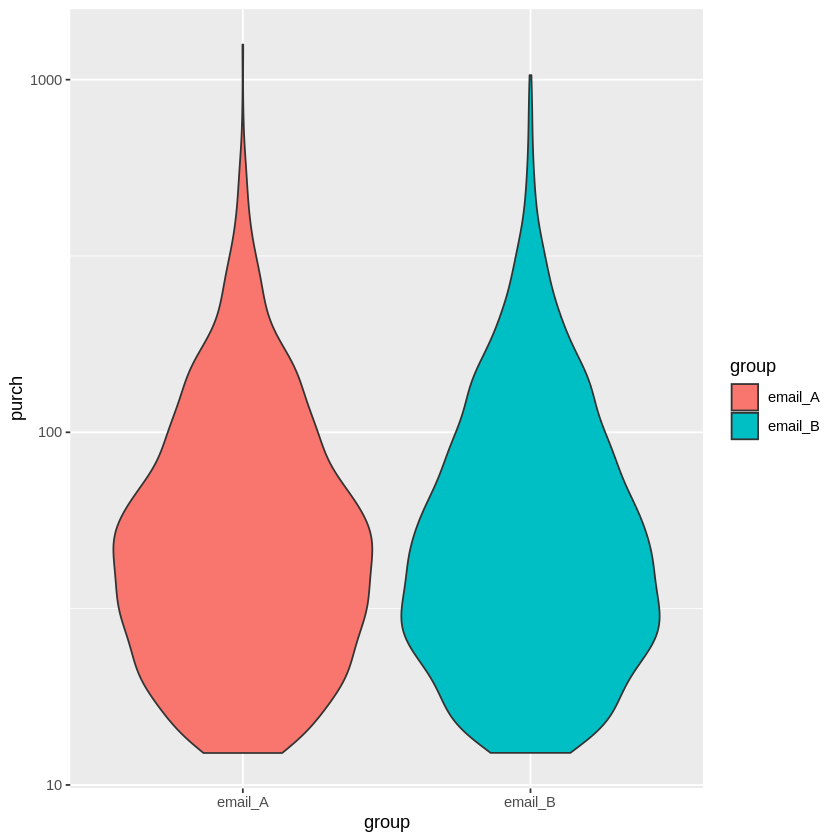

In [80]:
#violin plot of log purchases
ggplot(emailed, aes(x=group, y=purch, fill = group)) +
  geom_violin() + 
  scale_y_log10()

In [82]:
#t.test
t.test(purch ~ group, data = emailed)


	Welch Two Sample t-test

data:  purch by group
t = -1.0652, df = 10092, p-value = 0.2868
alternative hypothesis: true difference in means between group email_A and group email_B is not equal to 0
95 percent confidence interval:
 -3.557345  1.052290
sample estimates:
mean in group email_A mean in group email_B 
             25.23423              26.48676 


**PROBLEM**: Reading protocol

In [84]:
#read in and inspect
reading <- read_csv('reading_protocol.csv')
head(reading)

Rows: 44 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): group
dbl (3): id, g, drp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,group,g,drp
<dbl>,<chr>,<dbl>,<dbl>
1,Treat,0,24
2,Treat,0,56
3,Treat,0,43
4,Treat,0,59
5,Treat,0,58
6,Treat,0,52


In [86]:
#group summaries
reading %>% 
  group_by(group) %>%
    summarise(mean(drp))

group,mean(drp)
<chr>,<dbl>
Control,41.52174
Treat,51.47619


In [87]:
#t.test
t.test(drp ~ group, data = reading)


	Welch Two Sample t-test

data:  drp by group
t = -2.3109, df = 37.855, p-value = 0.02638
alternative hypothesis: true difference in means between group Control and group Treat is not equal to 0
95 percent confidence interval:
 -18.67588  -1.23302
sample estimates:
mean in group Control   mean in group Treat 
             41.52174              51.47619 


#### Subscription Dataset

In [88]:
#subscriber data
head(subscriber)

age,gender,income,kids,ownHome,subscribe,Segment
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
47.31613,Male,49482.81,2,ownNo,subNo,Suburb mix
31.38684,Male,35546.29,1,ownYes,subNo,Suburb mix
43.20034,Male,44169.19,0,ownYes,subNo,Suburb mix
37.31700,Female,81041.99,1,ownNo,subNo,Suburb mix
40.95439,Female,79353.01,3,ownYes,subNo,Suburb mix
43.03387,Male,58143.36,4,ownYes,subNo,Suburb mix


In [90]:
#group summaries
subscriber %>%
  group_by(ownHome) %>%
  summarise(mean(income))

ownHome,mean(income)
<chr>,<dbl>
ownNo,47391.01
ownYes,54934.68


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


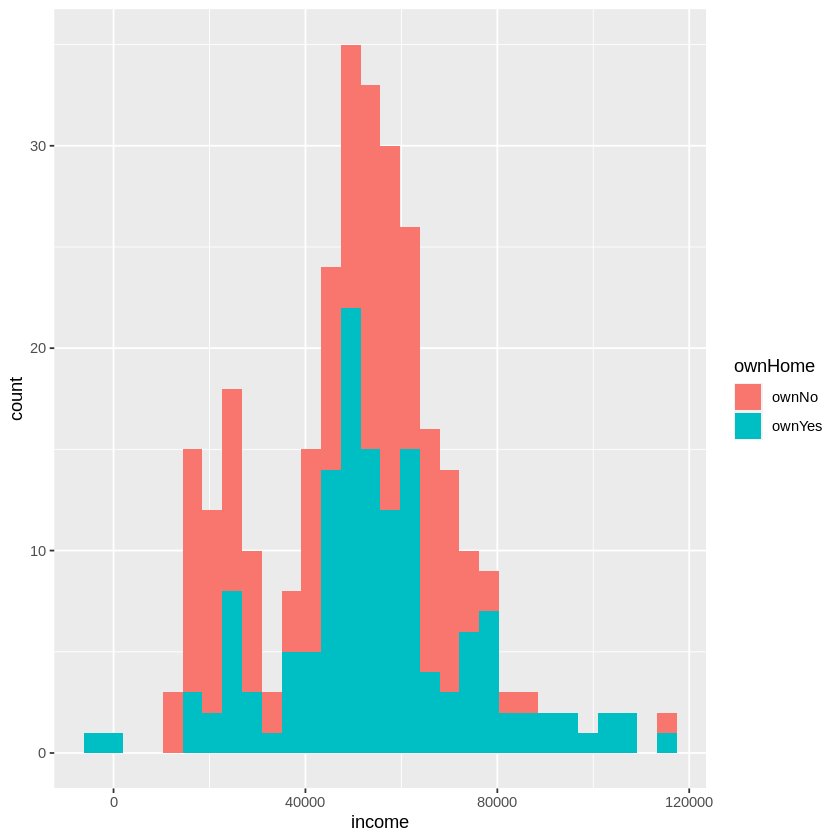

In [92]:
#visualizations
ggplot(subscriber, aes(x=income, fill = ownHome)) + geom_histogram()

In [93]:
#hypothesis tests
t.test(income ~ ownHome, data = subscriber)


	Welch Two Sample t-test

data:  income by ownHome
t = -3.2731, df = 285.25, p-value = 0.001195
alternative hypothesis: true difference in means between group ownNo and group ownYes is not equal to 0
95 percent confidence interval:
 -12080.155  -3007.193
sample estimates:
 mean in group ownNo mean in group ownYes 
            47391.01             54934.68 


#### Logistic Model

Using other information to predict proportions aka binomial target.  Below, we create a logistic model to predict whether a customer will open the email.

The null hypothesis here is that past purchases do not effect whether someone opens the email.

In [94]:
head(beaver1)

,day,time,temp,activ
,<dbl>,<dbl>,<dbl>,<dbl>
1,346,840,36.33,0
2,346,850,36.34,0
3,346,900,36.35,0
4,346,910,36.42,0
5,346,920,36.55,0
6,346,930,36.69,0


In [ ]:
#plot temperature vs. activity


In [ ]:
#build logistic model


In [ ]:
#summary


In [ ]:
#confint


#### Linear Regression

Now, the object predicted is continuous in nature -- similar to the example of a single observable variable and the difference in means.  We assume there is no relationship, test the significance of age on income.

In [ ]:
#age vs income


In [ ]:
#regression model


In [ ]:
#summarise


In [ ]:
#confidence interval


We interpret this confidence interval in a similar way -- we would expect a one year increase in age to effect income by somewhere in the 657.22 to 967.45 range.  This range does not include 0 -- but also helps to understand what values are possible rather than a single point value like the coefficient.